In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
dataset = pd.read_csv('D:\Ciencia de Datos EAN\Machine Learning\Proyecto1\Datos\ObesityDataSet_raw_and_data_sinthetic.csv')
X = dataset.drop(columns=['NObeyesdad'])
y = dataset['NObeyesdad']

<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\john_\AppData\Local\Temp\ipykernel_25252\1602943820.py:7: SyntaxWarning: invalid escape sequence '\C'
  dataset = pd.read_csv('D:\Ciencia de Datos EAN\Machine Learning\Proyecto1\Datos\ObesityDataSet_raw_and_data_sinthetic.csv')


In [2]:
print(dataset)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [3]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
dataset.describe()
numeric= dataset.select_dtypes(include=["number"])

numeric.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
correlation_matrix = numeric.corr()
print(correlation_matrix)

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


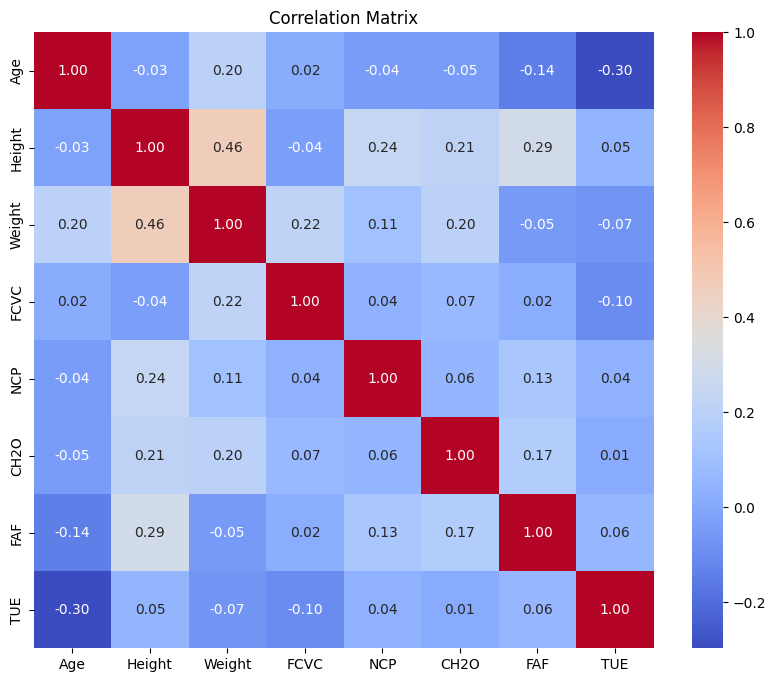

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [8]:
#instanciamos el objeto PCA
# modelo pide borrar n_iter
# aunque aca no corre abajo lo ejecuta porque???
# no me deja incluit los otros. 
pca = PCA(
    n_components=8,    


     copy=True,


     random_state=42
 )

In [9]:
pca = PCA()
pca.fit(numeric)

PCA()

In [10]:
explained_cumulative = pca.explained_variance_ratio_.cumsum()
n_components = (explained_cumulative >= 0.90).argmax() + 1
print("Número de componentes para explicar al menos el 90% de la varianza:", n_components)

Número de componentes para explicar al menos el 90% de la varianza: 1


In [11]:
explained_cumulative = pca.explained_variance_ratio_.cumsum()
print(explained_cumulative)

[0.94393677 0.99687508 0.99793246 0.99869414 0.99917463 0.99963718
 0.99999253 1.        ]


In [12]:
DF_PCA=pca.transform(numeric)
DF_PCA



DF_PCA_PANDA= pd.DataFrame(DF_PCA)

DF_PCA_PANDA.describe()


,0,1,2,3,4,5,6,7
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,-1.206341e-14,4.846904e-16,2.423452e-16,-3.853962e-16,-7.573288e-17,1.262215e-16,-3.197611e-17,-3.534201e-17
std,2.622536e+01,6.210620e+00,8.777375e-01,7.449674e-01,5.916896e-01,5.805352e-01,5.088380e-01,7.375204e-02
min,-4.775569e+01,-1.081723e+01,-1.975733e+00,-1.736455e+00,-1.253148e+00,-1.512441e+00,-1.171453e+00,-2.211272e-01
25%,-2.106434e+01,-4.292487e+00,-6.390667e-01,-5.531652e-01,-4.443378e-01,-4.067958e-01,-3.905971e-01,-5.430290e-02
50%,-3.643545e+00,-1.443693e+00,-4.423139e-02,-1.494586e-01,-6.673619e-02,2.235365e-02,-6.944933e-02,-5.714574e-03
75%,2.093070e+01,9.455882e-01,5.664261e-01,3.993954e-01,3.636216e-01,4.338431e-01,3.981348e-01,4.928987e-02
max,8.596846e+01,3.766787e+01,3.232571e+00,2.522751e+00,1.770200e+00,1.649078e+00,1.640134e+00,2.359756e-01


In [13]:
DF_PCA_PANDA.corr()

,0,1,2,3,4,5,6,7
0,1.000000e+00,7.809467e-16,9.390874e-16,9.421363e-17,1.121812e-15,2.196378e-16,-6.302493e-17,6.103995e-14
1,7.809467e-16,1.000000e+00,-1.188258e-15,8.176535e-17,2.434582e-16,5.536835e-17,-1.790870e-16,-8.015566e-15
2,9.390874e-16,-1.188258e-15,1.000000e+00,-1.354737e-16,1.025677e-16,2.868579e-16,-8.264399e-17,-1.364495e-14
3,9.421363e-17,8.176535e-17,-1.354737e-16,1.000000e+00,2.687027e-16,2.242039e-17,-3.511207e-16,2.072906e-15
4,1.121812e-15,2.434582e-16,1.025677e-16,2.687027e-16,1.000000e+00,-2.006558e-15,-4.412596e-16,-3.021062e-15
5,2.196378e-16,5.536835e-17,2.868579e-16,2.242039e-17,-2.006558e-15,1.000000e+00,-2.529345e-17,-1.251199e-15
6,-6.302493e-17,-1.790870e-16,-8.264399e-17,-3.511207e-16,-4.412596e-16,-2.529345e-17,1.000000e+00,-5.304853e-15
7,6.103995e-14,-8.015566e-15,-1.364495e-14,2.072906e-15,-3.021062e-15,-1.251199e-15,-5.304853e-15,1.000000e+00


In [19]:
DF_PCA_PANDA.describe()

,0,1,2,3,4,5,6,7
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,-1.206341e-14,4.846904e-16,2.423452e-16,-3.853962e-16,-7.573288e-17,1.262215e-16,-3.197611e-17,-3.534201e-17
std,2.622536e+01,6.210620e+00,8.777375e-01,7.449674e-01,5.916896e-01,5.805352e-01,5.088380e-01,7.375204e-02
min,-4.775569e+01,-1.081723e+01,-1.975733e+00,-1.736455e+00,-1.253148e+00,-1.512441e+00,-1.171453e+00,-2.211272e-01
25%,-2.106434e+01,-4.292487e+00,-6.390667e-01,-5.531652e-01,-4.443378e-01,-4.067958e-01,-3.905971e-01,-5.430290e-02
50%,-3.643545e+00,-1.443693e+00,-4.423139e-02,-1.494586e-01,-6.673619e-02,2.235365e-02,-6.944933e-02,-5.714574e-03
75%,2.093070e+01,9.455882e-01,5.664261e-01,3.993954e-01,3.636216e-01,4.338431e-01,3.981348e-01,4.928987e-02
max,8.596846e+01,3.766787e+01,3.232571e+00,2.522751e+00,1.770200e+00,1.649078e+00,1.640134e+00,2.359756e-01


In [21]:
# Assuming DF_PCA is a NumPy array
DF_PCA = pd.DataFrame(DF_PCA, columns=['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8'])

# Now you can access columns attribute
print(DF_PCA)

      Componente 1  Componente 2  Componente 3  Componente 4  Componente 5  \
0       -22.726798     -2.125701     -0.782597     -0.790042      0.248887   
1       -30.710296     -1.750980      2.058337      0.610965     -1.102637   
2        -9.644023     -0.842931      0.992385      0.093654      0.444282   
3         0.556035      2.655866      1.067146      0.160829     -0.699453   
4         3.085224     -2.420876     -1.709458      1.113928     -0.470460   
...            ...           ...           ...           ...           ...   
2106     44.588116     -5.676520      0.514265      0.087967      0.155229   
2107     46.974023     -4.781030      0.288225     -0.002734     -0.166617   
2108     46.948630     -4.241428      0.375645      0.032502     -0.118063   
2109     46.706111     -2.389669      0.334782      0.014402     -0.314007   
2110     46.795754     -3.093615      0.225194     -0.036099     -0.222747   

      Componente 6  Componente 7  Componente 8  
0         0.39

In [22]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

<Axes: xlabel='0', ylabel='1'>

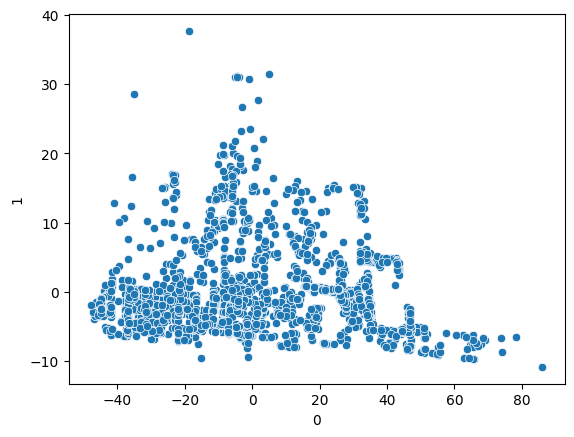

In [71]:
sns.scatterplot(x=DF_PCA_PANDA[0], y=DF_PCA_PANDA[7],data=DF_PCA_PANDA)

<Axes: xlabel='1', ylabel='7'>

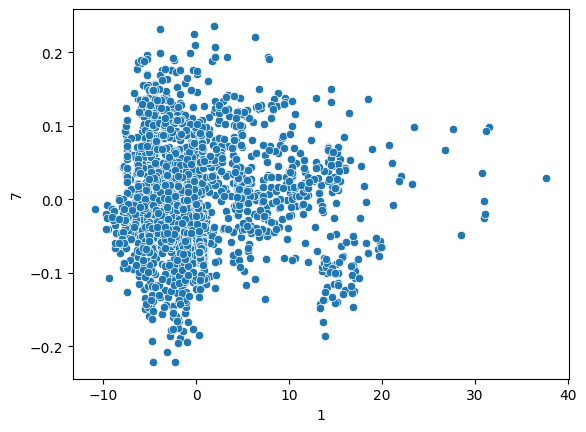

In [43]:
sns.scatterplot(x=DF_PCA_PANDA[1], y=DF_PCA_PANDA[7],data=DF_PCA_PANDA)

<Axes: xlabel='2', ylabel='3'>

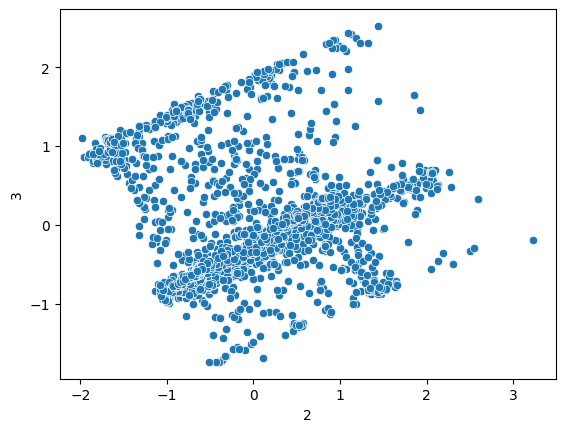

In [49]:
sns.scatterplot(x=DF_PCA_PANDA[2], y=DF_PCA_PANDA[3],data=DF_PCA_PANDA)

<Axes: xlabel='4', ylabel='6'>

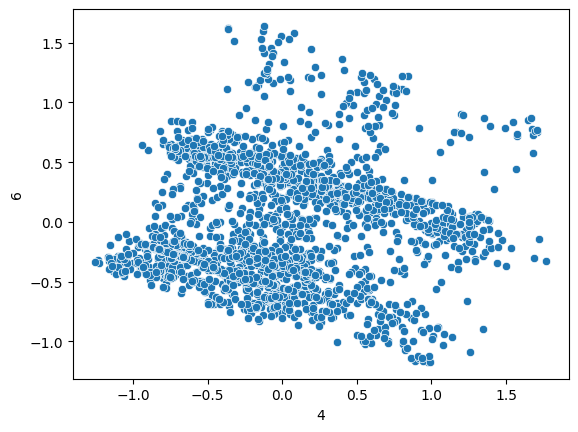

In [61]:
sns.scatterplot(x=DF_PCA_PANDA[4], y=DF_PCA_PANDA[6],data=DF_PCA_PANDA)

<Axes: xlabel='6', ylabel='7'>

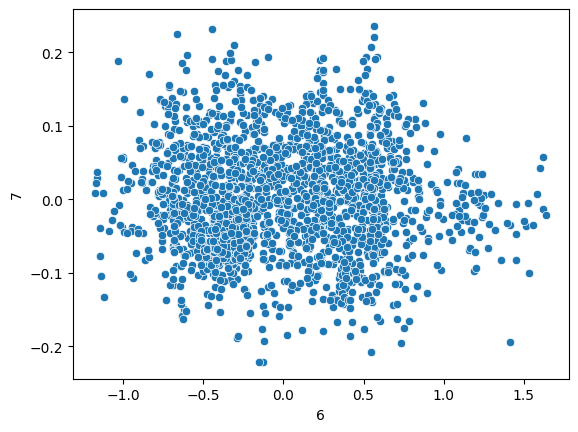

In [64]:
sns.scatterplot(x=DF_PCA_PANDA[6], y=DF_PCA_PANDA[7],data=DF_PCA_PANDA)

<Axes: xlabel='0', ylabel='7'>

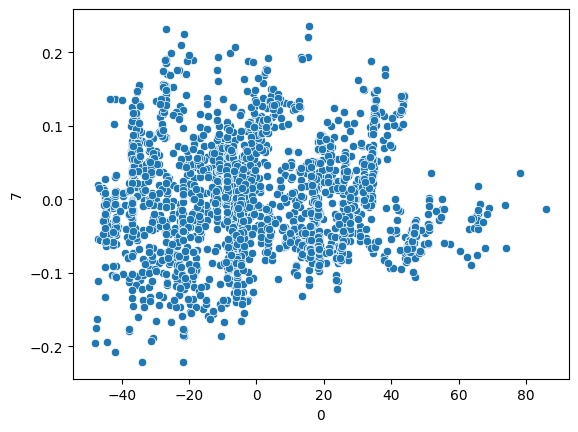

In [74]:
sns.scatterplot(x=DF_PCA_PANDA[0], y=DF_PCA_PANDA[7],data=DF_PCA_PANDA)

In [78]:
from sklearn.decomposition import PCA

# Assuming pca is your PCA object
pca = PCA(n_components=8)
pca.fit(DF_PCA_PANDA)

# Calculate cumulative percentage of variance explained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

print(cumulative_variance_ratio)

[0.94393677 0.99687508 0.99793246 0.99869414 0.99917463 0.99963718
 0.99999253 1.        ]


In [81]:
from sklearn.decomposition import PCA

# Assuming pca is your PCA object
pca = PCA(n_components=8)
pca.fit(DF_PCA_PANDA)

# Extract eigenvalues (variances)
eigenvalues = pca.explained_variance_

print(eigenvalues)

[6.87769255e+02 3.85718020e+01 7.70423133e-01 5.54976458e-01
 3.50096606e-01 3.37021117e-01 2.58916089e-01 5.43936307e-03]


In [83]:
# Assuming pca is your PCA object
pca = PCA(n_components=8)
pca.fit(DF_PCA_PANDA)

# Calculate total inertia (total variance)
total_inertia = sum(pca.explained_variance_)

print(total_inertia)

728.6179300628028


In [85]:
# Assuming pca is your PCA object
pca = PCA(n_components=8)
pca.fit(DF_PCA_PANDA)

# Access the loadings (components)
loadings = pca.components_

print(loadings)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00  9.43689571e-15  1.38777878e-17
   6.93889390e-17  1.73472348e-17 -2.08166817e-17 -1.33226763e-15]
 [ 0.00000000e+00 -9.43689571e-15  1.00000000e+00 -9.86840817e-16
  -1.83880688e-16  3.67327696e-16  2.11419424e-17 -1.03389519e-15]
 [ 0.00000000e+00  3.12250226e-17  4.64255370e-16  1.00000000e+00
   9.93942342e-16  1.51313966e-17 -4.10912623e-16  3.88578059e-16]
 [-0.00000000e+00  0.00000000e+00 -5.16947596e-16 -1.05238084e-15
   1.00000000e+00 -5.01131255e-14 -6.48027638e-16 -3.05311332e-16]
 [-0.00000000e+00 -1.38777878e-17 -4.21104124e-16  2.48824399e-17
   5.02781410e-14  1.00000000e+00  9.75077224e-16 -1.55257751e-16]
 [-0.00000000e+00  1.21430643e-17 -1.51788304e-17  5.29592104e-16
   6.77734778e-16 -8.55747222e-16  1.00000000e+00 -7.77156117e-16]
 [-0.00000000e+00  1.66533454e-15  1.31838984e-15 -2.92300906e-16
   

In [93]:
pca.inverse_transform(pca.transform(X))

NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

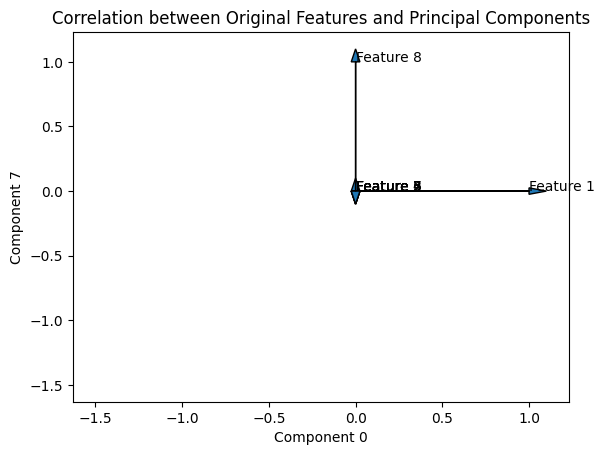

In [108]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming pca is your PCA object
pca = PCA(n_components=8)
pca.fit(DF_PCA_PANDA)

# Access the principal axes (components)
components = pca.components_

fig, ax = plt.subplots()
ax.axhline(-1.5,1.5, color='gray', lw=0.5)
ax.axvline(-1.5,1.5, color='gray', lw=0.5)

for idx, (x, y) in enumerate(zip(components[:, 0], components[:, 7])):
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1)
    ax.text(x, y, f"Feature {idx+1}")

plt.xlabel('Component 0')
plt.ylabel('Component 7')
plt.title('Correlation between Original Features and Principal Components')
plt.show()

Analisis de Correspondencias

In [109]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [113]:
datasetC=dataset.drop(columns=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad'], axis=1)
datasetC.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


In [117]:
import prince

## Instanciamos el objeto
mca = prince.MCA(
    n_components=8,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

## Entrenamos el objeto
mca = mca.fit(datasetC)

In [118]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.225,12.02%,12.02%
1,0.165,8.77%,20.80%
2,0.145,7.74%,28.54%
3,0.140,7.44%,35.98%
4,0.135,7.18%,43.16%
5,0.130,6.91%,50.08%
6,0.126,6.70%,56.78%
7,0.120,6.41%,63.19%


In [119]:
mca.row_coordinates(datasetC)

,0,1,2,3,4,5,6,7
0,0.384984,0.010481,0.594911,-0.150619,-0.233556,-0.203745,-0.094855,0.148705
1,1.148210,0.453200,-0.795005,-0.943597,0.659616,-0.417423,0.964193,1.064381
2,0.424655,0.894312,-0.383943,-0.512687,0.312116,-0.335320,-0.468413,0.389918
3,1.325299,1.489080,-0.163120,0.589741,0.681589,-0.540815,-0.557460,0.053802
4,0.603687,-0.036039,-0.140537,0.247412,-0.252461,0.025559,-0.027187,0.185950
...,...,...,...,...,...,...,...,...
2106,-0.202658,-0.366104,0.006706,-0.037931,0.140588,-0.193014,0.184358,-0.041264
2107,-0.202658,-0.366104,0.006706,-0.037931,0.140588,-0.193014,0.184358,-0.041264
2108,-0.202658,-0.366104,0.006706,-0.037931,0.140588,-0.193014,0.184358,-0.041264
2109,-0.202658,-0.366104,0.006706,-0.037931,0.140588,-0.193014,0.184358,-0.041264


In [120]:
DF_3d=mca.column_coordinates(datasetC)
DF_3d

,0,1,2,3,4,5,6,7
Gender_Female,0.259064,-0.526517,0.230418,-0.290044,0.205621,-0.347865,0.061314,-0.108084
Gender_Male,-0.252999,0.514192,-0.225024,0.283255,-0.200807,0.339722,-0.059879,0.105554
family_history_with_overweight_no,1.373411,-0.443149,-0.448024,0.226227,-0.189740,0.249630,-0.301208,-0.114264
family_history_with_overweight_yes,-0.306352,0.098848,0.099936,-0.050462,0.042323,-0.055682,0.067187,0.025488
FAVC_no,1.675089,0.505892,0.490233,0.002542,-0.455311,-0.321156,-0.097582,0.491753
FAVC_yes,-0.219934,-0.066422,-0.064366,-0.000334,0.059781,0.042167,0.012812,-0.064566
CAEC_Always,1.326330,2.155621,-1.215081,-0.110363,-0.478344,-2.140656,1.555903,-3.916531
CAEC_Frequently,1.576583,-0.300245,0.701875,-0.540023,0.523349,0.741121,-0.184837,0.531005
CAEC_Sometimes,-0.294259,0.003863,0.042408,0.000538,-0.027296,-0.076109,0.042164,0.034953
CAEC_no,1.324286,-0.949166,-3.535397,2.658525,-1.041593,1.341887,-2.199046,0.340810


In [122]:
mca.plot(
    datasetC,
    x_component=0,
y_component=1,
show_row_markers=False,

)

alt.LayerChart(...)

In [123]:
mca.column_cosine_similarities(datasetC)

,0,1,2,3,4,5,6,7
Gender_Female,0.065543,0.270731,0.051849,8.215657e-02,0.041290,0.118177,0.003671,0.011409
Gender_Male,0.065543,0.270731,0.051849,8.215657e-02,0.041290,0.118177,0.003671,0.011409
family_history_with_overweight_no,0.420747,0.043805,0.044774,1.141587e-02,0.008030,0.013900,0.020237,0.002912
family_history_with_overweight_yes,0.420747,0.043805,0.044774,1.141587e-02,0.008030,0.013900,0.020237,0.002912
FAVC_no,0.368409,0.033602,0.031554,8.486932e-07,0.027219,0.013542,0.001250,0.031750
FAVC_yes,0.368409,0.033602,0.031554,8.486932e-07,0.027219,0.013542,0.001250,0.031750
CAEC_Always,0.045304,0.119667,0.038023,3.136738e-04,0.005893,0.118011,0.062344,0.395033
CAEC_Frequently,0.321840,0.011672,0.063786,3.775991e-02,0.035464,0.071119,0.004424,0.036509
CAEC_Sometimes,0.441701,0.000076,0.009174,1.478197e-06,0.003801,0.029549,0.009069,0.006232
CAEC_no,0.043418,0.022304,0.309442,1.749784e-01,0.026860,0.044579,0.119721,0.002876


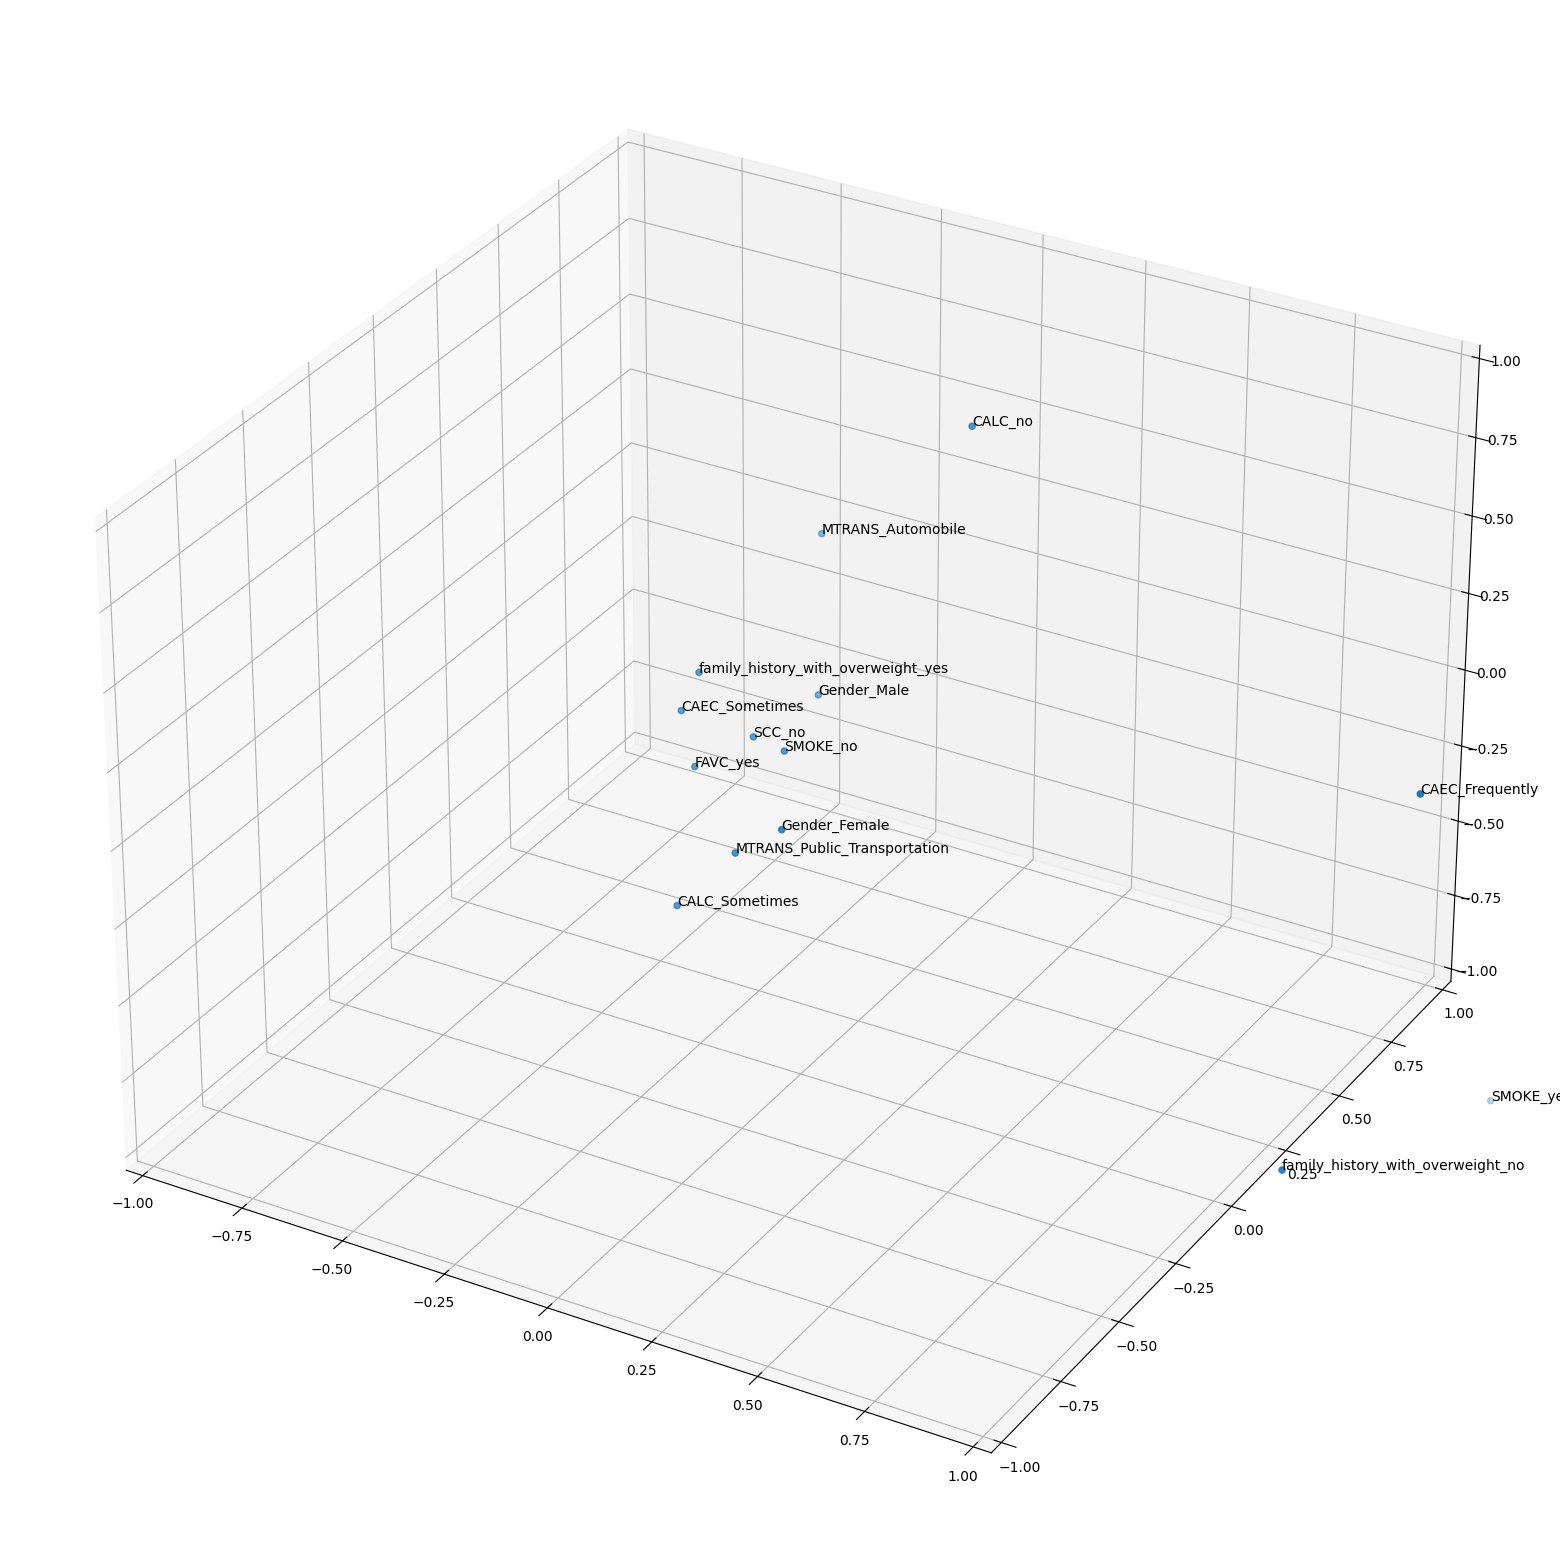

In [124]:
### Pintemos en 3d

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)


ax.scatter(DF_3d[0], DF_3d[1], DF_3d[2])

for i in range(len(DF_3d)):
    ax.text(DF_3d.iloc[i,0],DF_3d.iloc[i,1],DF_3d.iloc[i,2],DF_3d.index[i])

plt.show()